# Cleaning of DomesticDeclarations.xes

In [1]:
import pm4py
import matplotlib.pyplot as plt

In [2]:
# Load the XES file and convert it to a DataFrame
xes_filename = '../datasets/DomesticDeclarations.xes'
log = pm4py.read_xes(xes_filename)
df = pm4py.convert_to_dataframe(log)

df['case:id'] = df['case:id'].astype(str) #to reduce errors

df

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 17:50:14+00:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 17:56:13+00:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 08:55:52+00:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 08:20:28+00:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576


In [3]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56437 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      56437 non-null  object             
 1   org:resource            56437 non-null  object             
 2   concept:name            56437 non-null  object             
 3   time:timestamp          56437 non-null  datetime64[ns, UTC]
 4   org:role                56437 non-null  object             
 5   case:id                 56437 non-null  object             
 6   case:concept:name       56437 non-null  object             
 7   case:BudgetNumber       56437 non-null  object             
 8   case:DeclarationNumber  56437 non-null  object             
 9   case:Amount             56437 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.3+ MB


In [4]:
# Compute frequency of activities
activity_counts = df["concept:name"].value_counts()
print("Frequency of Activities:\n", activity_counts)
print(type(activity_counts))

Frequency of Activities:
 concept:name
Declaration SUBMITTED by EMPLOYEE             11531
Declaration FINAL_APPROVED by SUPERVISOR      10131
Payment Handled                               10044
Request Payment                               10040
Declaration APPROVED by ADMINISTRATION         8202
Declaration APPROVED by BUDGET OWNER           2820
Declaration REJECTED by EMPLOYEE               1365
Declaration REJECTED by ADMINISTRATION          952
Declaration APPROVED by PRE_APPROVER            685
Declaration REJECTED by SUPERVISOR              293
Declaration SAVED by EMPLOYEE                   135
Declaration REJECTED by MISSING                  91
Declaration REJECTED by PRE_APPROVER             86
Declaration REJECTED by BUDGET OWNER             59
Declaration FOR_APPROVAL by SUPERVISOR            1
Declaration FOR_APPROVAL by PRE_APPROVER          1
Declaration FOR_APPROVAL by ADMINISTRATION        1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
# Count the undefined roles
undefined_count = df['org:role'].astype(str).str.contains('UNDEFINED').sum()

undefined_count

20084

In [6]:
# Group by unique ids
unique_cases = df.groupby('case:id').size()

unique_cases

case:id
declaration 100000    5
declaration 100005    5
declaration 100010    5
declaration 100015    6
declaration 100021    6
                     ..
declaration 99973     5
declaration 99978     5
declaration 99983     6
declaration 99989     6
declaration 99995     5
Length: 10500, dtype: int64

In [7]:
# Get and display the variants

variants = pm4py.get_variants(
    df,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

print(variants)

{('Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by ADMINISTRATION', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled'): 4618, ('Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by ADMINISTRATION', 'Declaration APPROVED by BUDGET OWNER', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled'): 2473, ('Declaration SUBMITTED by EMPLOYEE', 'Declaration REJECTED by ADMINISTRATION', 'Declaration REJECTED by EMPLOYEE', 'Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by ADMINISTRATION', 'Declaration APPROVED by BUDGET OWNER', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled'): 188, ('Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by PRE_APPROVER', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Declaration REJECTED by MISSING', 'Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by ADMINISTRATION', 'Declaration APPROVED by BUDGET OWNER', 'Declaration FINAL_APP

In [8]:
# Also for variants, but provides a batter overview of the variants and their frequencies

variants_df = pm4py.get_variants_paths_duration(
    df,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

variants_df

,@@index_in_trace,@@flow_time,@@cumulative_occ_path_column,concept:name,concept:name_2,@@variant_column,@@variant_count
0,0,1.159105e+05,0,Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",4618
1,1,1.681298e+05,0,Declaration APPROVED by ADMINISTRATION,Declaration FINAL_APPROVED by SUPERVISOR,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",4618
2,2,2.295982e+05,0,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",4618
3,3,2.965494e+05,0,Request Payment,Payment Handled,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",4618
0,0,9.859310e+04,0,Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",2473
...,...,...,...,...,...,...,...
0,0,2.020000e+02,0,Declaration SUBMITTED by EMPLOYEE,Declaration APPROVED by ADMINISTRATION,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1
1,1,9.812500e+04,0,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1
2,2,3.414360e+05,0,Declaration APPROVED by BUDGET OWNER,Declaration REJECTED by SUPERVISOR,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1
0,0,1.471681e+06,0,Declaration SAVED by EMPLOYEE,Request Payment,"(Declaration SAVED by EMPLOYEE, Request Paymen...",1


In [ ]:
# Dataframe with sorting of the variants
variants = variants_df.groupby('@@variant_column').agg({'@@variant_count': 'first'}).reset_index()

# Sorting the DataFrame by '@@variant_count' column in descending order
variants = variants.sort_values(by='@@variant_count', ascending=False).reset_index(drop=True) # This resets the index after sorting. drop=True ensures the old index is not added as a new column.

variants

,@@variant_column,@@variant_count
0,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",4618
1,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",2473
2,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1392
3,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",575
4,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",345
...,...,...
93,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1
94,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1
95,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1
96,"(Declaration SUBMITTED by EMPLOYEE, Declaratio...",1


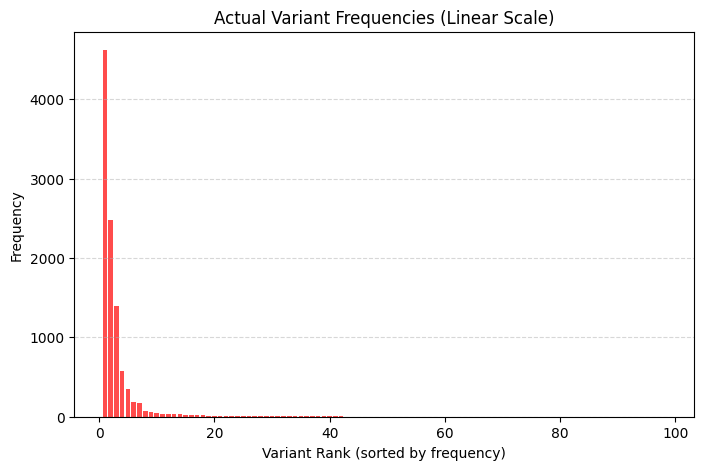

In [10]:
# Create a variable for the distribution 
distribution = variants['@@variant_count']

# Raw Frequency Plot (Linear Scale)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(distribution)+1), distribution, color='red', alpha=0.7)
plt.title("Actual Variant Frequencies (Linear Scale)")
plt.xlabel("Variant Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.grid(True, axis='y', ls="--", alpha=0.5)
plt.show()

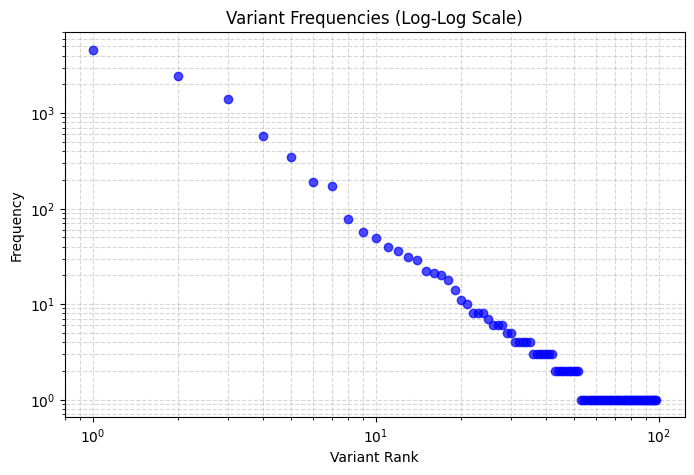

In [11]:
# Log-Log Plot
plt.figure(figsize=(8, 5))
plt.loglog(range(1, len(distribution)+1), distribution, 'bo', alpha=0.7)
plt.title("Variant Frequencies (Log-Log Scale)")
plt.xlabel("Variant Rank")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

In [ ]:
# Display the top N variants
top_n = 5
print(top_n, " more frequent variants")
print(variants.head(top_n))

# Evaluate the coverage of the top N variants
total_cases = variants['@@variant_count'].sum()
cases_in_top_n = variants['@@variant_count'].head(top_n).sum()
percentage_coverage = (cases_in_top_n / total_cases) * 100
print(f"\nTop {top_n} variants cover {percentage_coverage:.2f}% of total cases")

5  more frequent variants
                                    @@variant_column  @@variant_count
0  (Declaration SUBMITTED by EMPLOYEE, Declaratio...             4618
1  (Declaration SUBMITTED by EMPLOYEE, Declaratio...             2473
2  (Declaration SUBMITTED by EMPLOYEE, Declaratio...             1392
3  (Declaration SUBMITTED by EMPLOYEE, Declaratio...              575
4  (Declaration SUBMITTED by EMPLOYEE, Declaratio...              345

Top 5 variants cover 90.71% of total cases


In [13]:
filtered_df = pm4py.filter_variants_top_k(
    df,
    5,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

filtered_df

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 17:50:14+00:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 17:56:13+00:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 08:55:52+00:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 08:20:28+00:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576


In [14]:
# Get original counts
original_rows = len(df)
original_cases = df["case:id"].nunique()

# Get filtered counts
filtered_rows = len(filtered_df)
filtered_cases = filtered_df["case:id"].nunique()

# Calculate the difference
removed_rows = original_rows - filtered_rows
removed_cases = original_cases - filtered_cases

print(f"Original DataFrame: {original_rows} rows, {original_cases} unique case IDs")
print(f"Filtered DataFrame (Top K variants): {filtered_rows} rows, {filtered_cases} unique case IDs")
print(f"\nRemoved: {removed_rows} rows")
print(f"Removed: {removed_cases} unique case IDs")

print(f"\nPercentage of rows removed: {(removed_rows / original_rows) * 100:.2f}%")
print(f"Percentage of cases removed: {(removed_cases / original_cases) * 100:.2f}%")

Original DataFrame: 56437 rows, 10500 unique case IDs
Filtered DataFrame (Top K variants): 49131 rows, 9403 unique case IDs

Removed: 7306 rows
Removed: 1097 unique case IDs

Percentage of rows removed: 12.95%
Percentage of cases removed: 10.45%


In [22]:
# Create a temporary column with the variant tuple for each event's case
filtered_df['_temp_variant_tuple'] = filtered_df.sort_values(by='time:timestamp').groupby('case:id')['concept:name'].transform(lambda x: tuple(x))

# Get unique variant tuples and assign them a number
unique_variant_tuples = filtered_df['_temp_variant_tuple'].unique()
variant_to_number = {variant_tuple: i for i, variant_tuple in enumerate(unique_variant_tuples, 1)}

# Map the temporary variant tuple column to the new 'variant_number' column
filtered_df['variant_number'] = filtered_df['_temp_variant_tuple'].map(variant_to_number)

# Drop the temporary column
filtered_df = filtered_df.drop(columns=['_temp_variant_tuple'])

# Display the number of unique variant numbers assigned and their counts
print(f"\nNumber of unique variant numbers assigned: {filtered_df['variant_number'].nunique()}")
print("Counts of each variant number:")
print(filtered_df['variant_number'].value_counts().sort_index())

filtered_df


Number of unique variant numbers assigned: 9
Counts of each variant number:
variant_number
1    9748
2    9403
3    9403
4    9403
5     575
6    7436
7     345
8     345
9    2473
Name: count, dtype: int64


,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,variant_number
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,1
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,2
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,3
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,4
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172,1
...,...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 17:50:14+00:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576,1
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 17:56:13+00:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576,6
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 08:55:52+00:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576,2
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 08:20:28+00:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576,3


In [16]:
# Add a new DataFrame to store the durations of each case
filtered_df_dur = filtered_df.copy()

# Min and Max Timestamps for Case Durations
min_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].min()
max_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].max()

# Case Durations as Timedelta and convert to seconds
case_durations_timedelta = max_timestamps - min_timestamps
case_durations_seconds = case_durations_timedelta.dt.total_seconds()

# Mapping, conversion and new columns
filtered_df_dur.loc[:, 'case_duration_seconds'] = filtered_df_dur['case:id'].map(case_durations_seconds)
filtered_df_dur.loc[:, 'case_duration_minutes'] = filtered_df_dur['case_duration_seconds'] / 60
filtered_df_dur.loc[:, 'case_duration_hours'] = filtered_df_dur['case_duration_seconds'] / 3600
filtered_df_dur.loc[:, 'case_duration_days'] = filtered_df_dur['case_duration_seconds'] / (24 * 3600)

# Statistics for case durations
print(f"Mean duration (days): {filtered_df_dur['case_duration_days'].mean():.2f}")
print(f"Median duration (days): {filtered_df_dur['case_duration_days'].median():.2f}")
print(f"Max duration (days): {filtered_df_dur['case_duration_days'].max():.2f}")
print(f"Min duration (days): {filtered_df_dur['case_duration_days'].min():.2f}")
print(f"N° of Nan created: {filtered_df_dur['case_duration_seconds'].isna().sum()}")

Mean duration (days): 10.94
Median duration (days): 7.36
Max duration (days): 290.91
Min duration (days): 1.06
N° of Nan created: 0


In [17]:
# Find the number of cases with zero duration
zero_duration_cases_count = (filtered_df_dur['case_duration_seconds'] == 0).sum()

print(f"Number of cases with zero duration (seconds): {zero_duration_cases_count}")

Number of cases with zero duration (seconds): 0


In [18]:
# Create a copy of the filtered DataFrame for further analysis

df_cleaned = filtered_df_dur.copy()

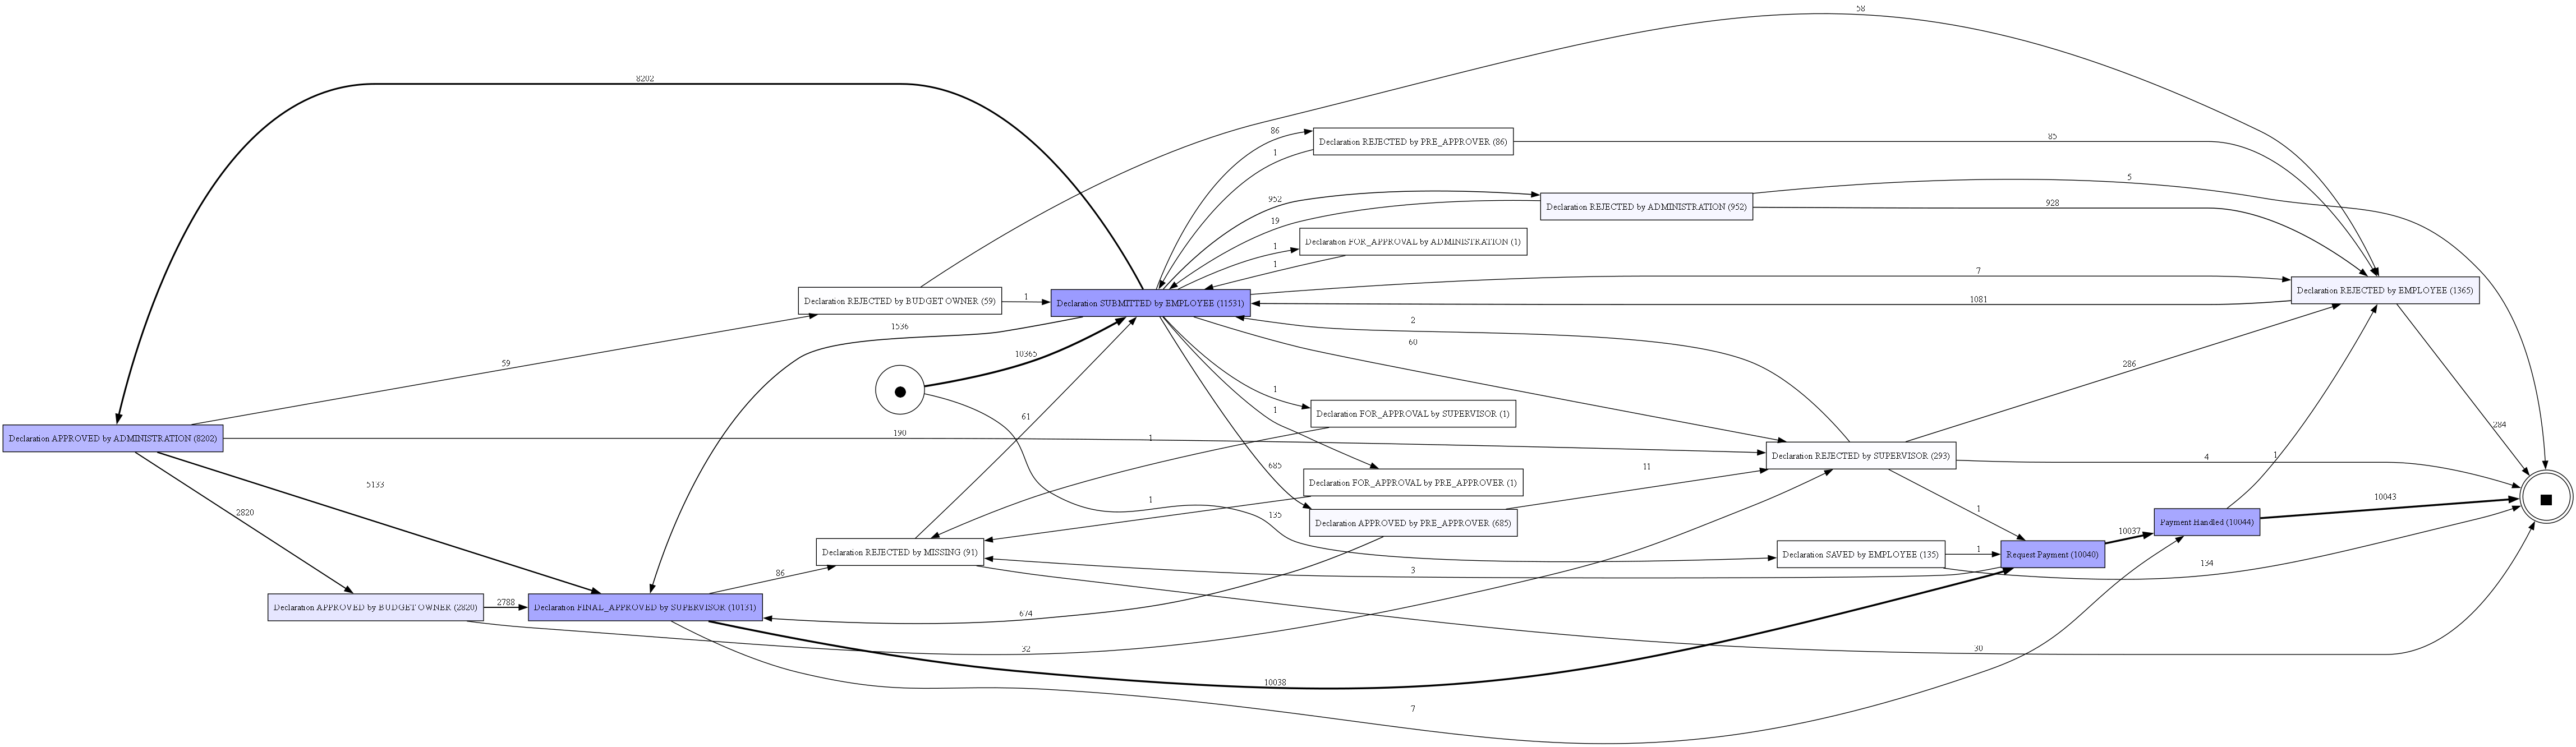

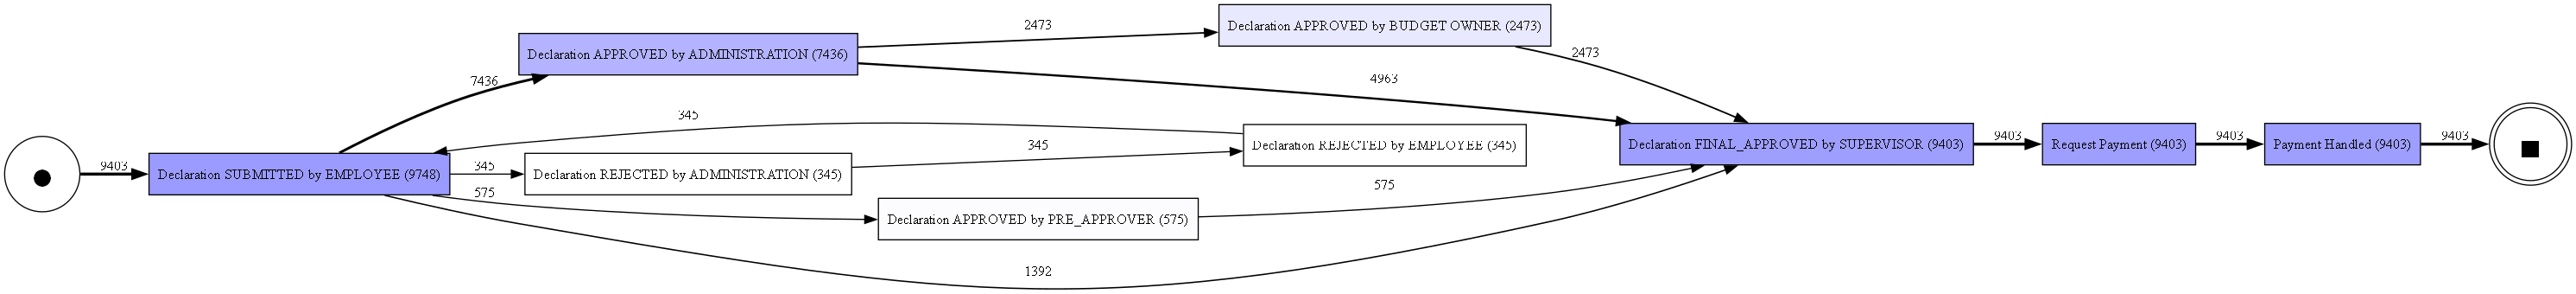

In [ ]:
# Directly Follows Graph (DFG)

# Create graph from original DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Create graph from filtered DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df_cleaned)
pm4py.view_dfg(dfg, start_activities, end_activities)

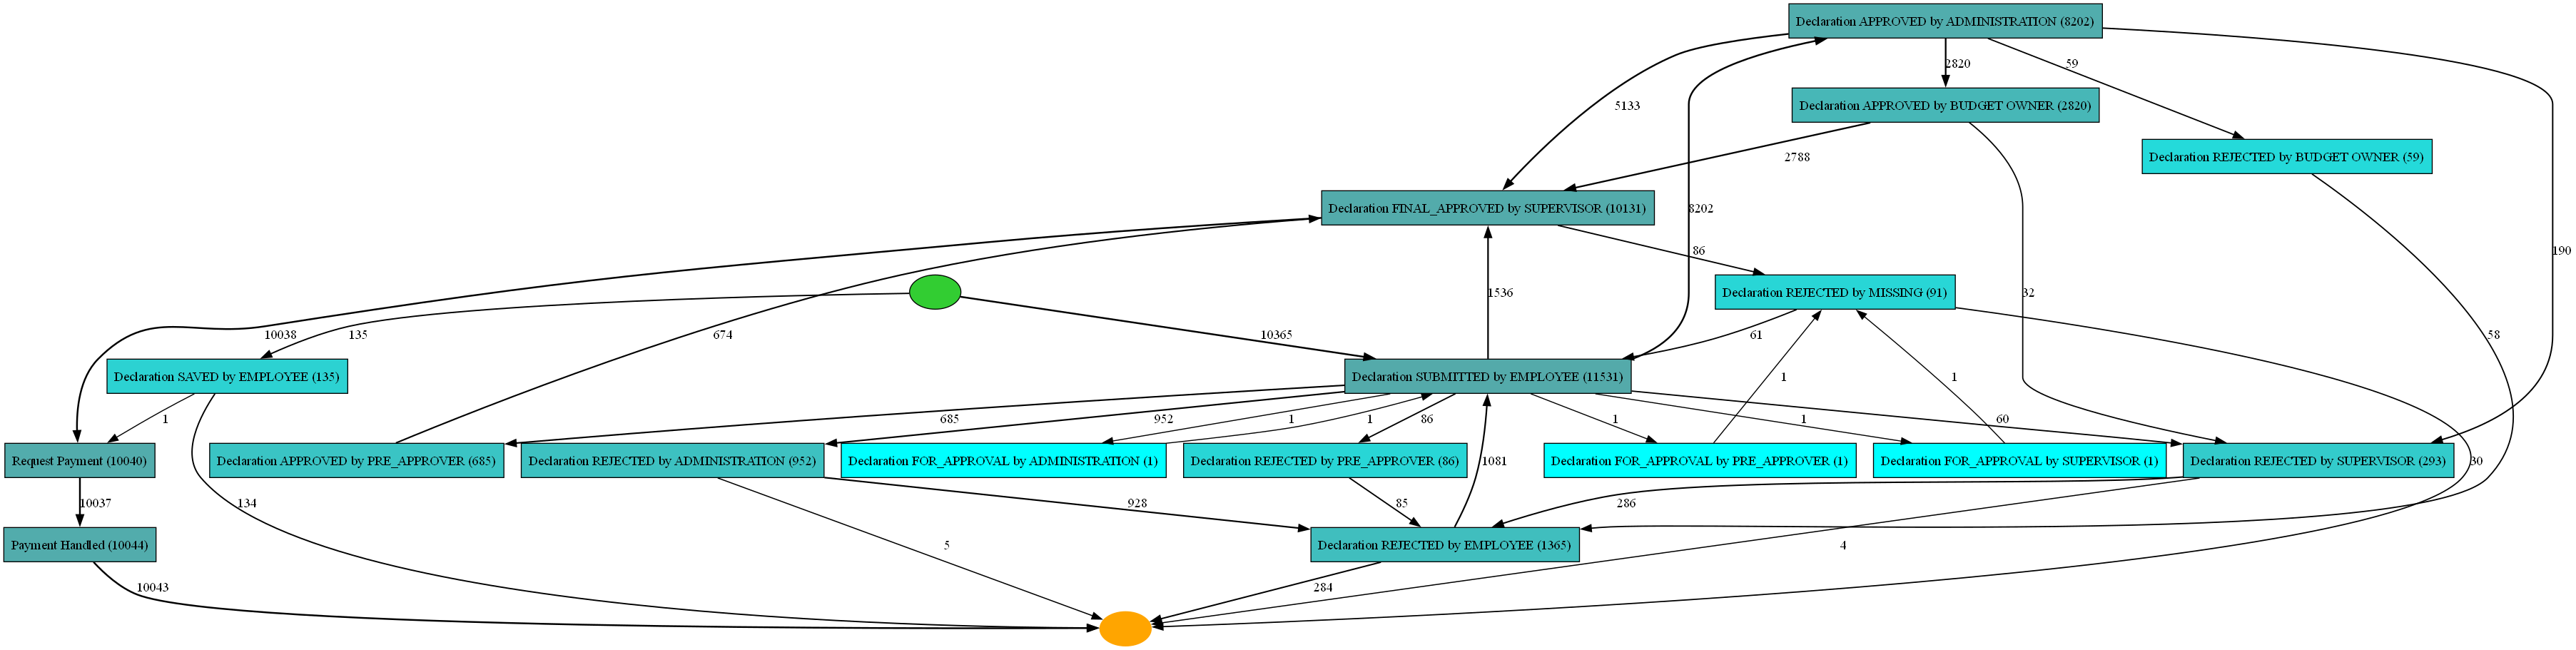

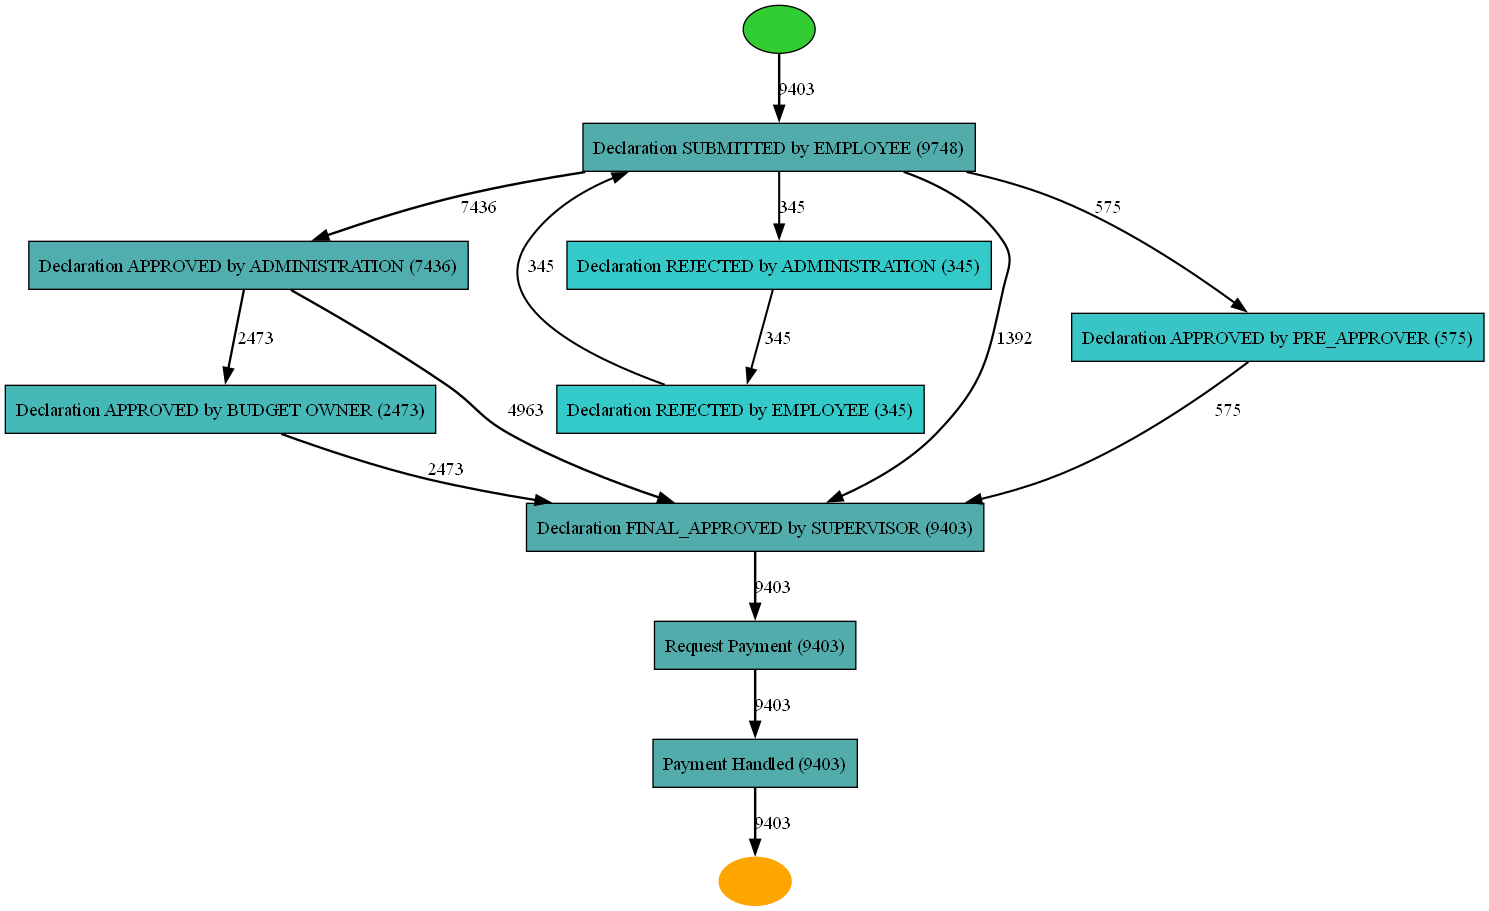

In [ ]:
# Heuristic Miner (HM)

# Discover the HM-map of the original DF and visualise it
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

# Discover the HM-map of the filtered DF and visualise it
map = pm4py.discover_heuristics_net(df_cleaned)
pm4py.view_heuristics_net(map)

In [21]:
# Export the cleaned DataFrame to an XES file

"""
log_name_for_file = "DomesticDeclarations_cleaned.xes"
log = pm4py.convert_to_event_log(df_cleaned,
                                 case_id_key='case:id',
                                 activity_key='concept:name',
                                 timestamp_key='time:timestamp')

pm4py.write_xes(log, log_name_for_file)

print(f"Log succesfully exported in: {log_name_for_file}")
"""

'\nlog_name_for_file = "DomesticDeclarations_cleaned.xes"\nlog = pm4py.convert_to_event_log(df_cleaned,\n                                 case_id_key=\'case:id\',\n                                 activity_key=\'concept:name\',\n                                 timestamp_key=\'time:timestamp\')\n\npm4py.write_xes(log, log_name_for_file)\n\nprint(f"Log succesfully exported in: {log_name_for_file}")\n'